**21-03-12 python 13_데이터 시각화(seaborn) (c)cherryuki (ji)**

# ch13_데이터 시각화_빅데이터 처리 시스템 포트폴리오
## 예제1) 전국 신규 민간 아파트 분양가격 동향

### 1. 시작 전 설정

In [232]:
#새 파일 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineVackend.figure_format = 'retina'
#한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) #y축
#경고 메시지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default') #경고 메시지 보이게

In [100]:
import pandas as pd
import numpy as np

### 2. https://www.data.go.kr “주택도시보증공사_전국 신규 민간아파트 분양가격 동향”
- ① 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색
- ② 이후 데이터는 df_last 변수에 담아 탐색

In [299]:
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_last = pd.read_csv('data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210215.csv', encoding='CP949')

In [4]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


### 3. df_last의 데이터 결측치를 확인하고 대체할지 고민

In [300]:
df_last.isnull().sum() #분양가격에만 결측치 

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    430
dtype: int64

In [296]:
df_last.info() #5440 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5440 non-null   object
 1   규모구분     5440 non-null   object
 2   연도       5440 non-null   int64 
 3   월        5440 non-null   int64 
 4   분양가격(㎡)  5010 non-null   object
dtypes: int64(2), object(3)
memory usage: 212.6+ KB


### 4. df_last 데이터셋에 평당분양가격 칼럼 추가

In [297]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5440 non-null   object 
 1   규모구분     5440 non-null   object 
 2   연도       5440 non-null   int64  
 3   월        5440 non-null   int64  
 4   분양가격(㎡)  4918 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 212.6+ KB


In [298]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


### 4-2. 분양가격 , 있는 것도 바꿔서 처리

In [301]:
df_last.loc[df_last["분양가격(㎡)"].notnull() & (df_last["분양가격(㎡)"].str.find(",")!=-1)]

,지역명,규모구분,연도,월,분양가격(㎡)
2125,서울,모든면적,2017,11,"6,657"
2126,서울,전용면적 60㎡이하,2017,11,"6,931"
2127,서울,전용면적 60㎡초과 85㎡이하,2017,11,"5,899"
2128,서울,전용면적 85㎡초과 102㎡이하,2017,11,"7,311"
2129,서울,전용면적 102㎡초과,2017,11,"6,880"
...,...,...,...,...,...
2203,경남,전용면적 85㎡초과 102㎡이하,2017,11,"2,914"
2204,경남,전용면적 102㎡초과,2017,11,"2,838"
2205,제주,모든면적,2017,11,"3,560"
2206,제주,전용면적 60㎡이하,2017,11,"5,380"


In [307]:
##이부분만 다시 쳐보기!!!

In [284]:
df_last['분양가격(㎡)'].describe() #문자형기술통계 요약정보

count     5010
unique    2068
top       3395
freq        18
Name: 분양가격(㎡), dtype: object

In [286]:
df_last['분양가격(㎡)'].str.replace(',','')

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
5435    5199
5436    4686
5437    5203
5438     NaN
5439     NaN
Name: 분양가격(㎡), Length: 5440, dtype: object

In [288]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5440 non-null   object
 1   규모구분     5440 non-null   object
 2   연도       5440 non-null   int64 
 3   월        5440 non-null   int64 
 4   분양가격(㎡)  5010 non-null   object
dtypes: int64(2), object(3)
memory usage: 212.6+ KB


In [293]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    522
평당분양가격     522
dtype: int64

In [290]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last['분양가격(㎡)'].describe() #숫자형 기술통계 요약정보

count     4918.000000
mean      3378.871899
std       1371.658155
min       1868.000000
25%       2516.000000
50%       2999.500000
75%       3824.750000
max      13835.000000
Name: 분양가격(㎡), dtype: float64

In [291]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [292]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5440 non-null   object 
 1   규모구분     5440 non-null   object 
 2   연도       5440 non-null   int64  
 3   월        5440 non-null   int64  
 4   분양가격(㎡)  4918 non-null   float64
 5   평당분양가격   4918 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 255.1+ KB


### 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다(아래와 같이 규모구분 컬럼을 이용)

In [35]:
df_last['전용면적'] = df_last['규모구분'].apply(lambda x:x.replace('전용면적', '').strip().replace(' ',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x:x.replace('초과','~').replace('이하',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x:x.replace('모든면적','전체'))
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적60㎡,2015,10,5652.0,18651.6,60㎡
2,서울,전용면적60㎡~85㎡,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적85㎡~102㎡,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적102㎡~,2015,10,5879.0,19400.7,102㎡~


In [34]:
df_last['전용면적'] = df_last['규모구분'].str.replace("전용면적", "")
df_last['규모구분'] = df_last['규모구분'].str.replace('초과','~').str.replace('이하','')
df_last['규모구분'] = df_last['규모구분'].str.replace('모든면적','전체').str.replace(' ','')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적60㎡,2015,10,5652.0,18651.6,60㎡
2,서울,전용면적60㎡~85㎡,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적85㎡~102㎡,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적102㎡~,2015,10,5879.0,19400.7,102㎡~


### 6. 메모리 사용량을 줄이기 위해 사용하지 않을 컬럼은 제거한 후(df_last.drop([‘규모구분’,’분양가격((㎡)’], axis=1 이용), 메모리 사용량을 전후로 확인

In [36]:
df_last.info() #memory usage: 297.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5440 non-null   object 
 1   규모구분     5440 non-null   object 
 2   연도       5440 non-null   int64  
 3   월        5440 non-null   int64  
 4   분양가격(㎡)  4918 non-null   float64
 5   평당분양가격   4918 non-null   float64
 6   전용면적     5440 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 297.6+ KB


In [37]:
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis=1)
df_last.info() #memory usage: 212.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5440 non-null   object 
 1   연도      5440 non-null   int64  
 2   월       5440 non-null   int64  
 3   평당분양가격  4918 non-null   float64
 4   전용면적    5440 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 212.6+ KB


### 7. GroupBy(unstack()함수 이용) vs. pivot_table
- 지역별 데이터 수
- 지역별 평당분양가격(평균)
- 전용면적별 평당분양가격(평균)
- 지역별, 전용면적별 평당분양가격(평균)
- 연도, 지역별 평당분양가격(평균) - 힌트:unstack()

In [19]:
#지역별 데이터 수1 - groupby
df_last.groupby(df_last['지역명']).count()

,연도,월,평당분양가격,전용면적
지역명,,,,
강원,320,320,303,320
경기,320,320,315,320
경남,320,320,306,320
경북,320,320,294,320
광주,320,320,262,320
대구,320,320,307,320
대전,320,320,239,320
부산,320,320,315,320
서울,320,320,315,320


In [20]:
#지역별 데이터 수2 - pivot_table
df_last.pivot_table(index='지역명', aggfunc='count')

,연도,월,전용면적,평당분양가격
지역명,,,,
강원,320,320,320,303
경기,320,320,320,315
경남,320,320,320,306
경북,320,320,320,294
광주,320,320,320,262
대구,320,320,320,307
대전,320,320,320,239
부산,320,320,320,315
서울,320,320,320,315


In [107]:
#지역별 평당분양가격(평균)1 - groupby
df_last.groupby(['지역명'])['평당분양가격'].mean().to_frame()

,평당분양가격
지역명,
강원,8390.571287
경기,13713.354286
경남,9589.627451
경북,8690.617347
광주,10756.677481
대구,12691.950489
대전,10412.425105
부산,12351.711429
서울,24867.846667


In [47]:
#지역별 평당분양가격(평균)2 - pivot_table
pd.pivot_table(df_last, index='지역명', values='평당분양가격')

,평당분양가격
지역명,
강원,8390.571287
경기,13713.354286
경남,9589.627451
경북,8690.617347
광주,10756.677481
대구,12691.950489
대전,10412.425105
부산,12351.711429
서울,24867.846667


In [97]:
#전용면적별 평당분양가격(평균)1 - groupby
t = df_last.groupby(['전용면적'])['평당분양가격'].mean().to_frame()
t = t.loc[['60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~','전체'],:]
t

,평당분양가격
전용면적,
60㎡,10802.735170
60㎡~85㎡,10694.895726
85㎡~102㎡,11733.047719
102㎡~,11987.947280
전체,10702.628125


In [53]:
#전용면적별 평당분양가격(평균)2 - pivot_table
t = df_last.pivot_table(index='전용면적', values='평당분양가격')
t = t.loc[['60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~','전체'],:]
t

,평당분양가격
전용면적,
60㎡,10802.735170
60㎡~85㎡,10694.895726
85㎡~102㎡,11733.047719
102㎡~,11987.947280
전체,10702.628125


In [86]:
#지역별, 전용면적별 평당분양가격(평균)1 - groupby
t = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack()
t = t.loc[:,['전체','60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~']]
t

전용면적,전체,60㎡,60㎡~85㎡,85㎡~102㎡,102㎡~
지역명,,,,,
강원,7876.314286,8054.357143,7854.523810,8896.476471,9367.547619
경기,12936.419048,13508.838095,12896.871429,14188.533333,15036.109524
경남,8963.847619,8874.457377,8929.957143,10913.257143,10325.700000
경북,8393.838095,8375.609524,8376.919048,9093.113333,9360.505000
광주,10445.861905,10174.696552,10455.080952,11197.960714,11956.296000
대구,12470.804762,12577.033333,12475.623810,12120.060000,13743.609524
대전,10047.766667,9561.084211,9989.728571,9037.430769,14875.080000
부산,12219.323810,11704.628571,12168.880952,12378.509524,13287.214286
서울,23519.152381,24151.390476,23612.809524,28293.833333,24762.047619


In [85]:
#지역별, 전용면적별 평당분양가격(평균)2 - pivot_table
t = df_last.pivot_table(index=['지역명','전용면적'],values='평당분양가격').unstack()
t.columns = t.columns.droplevel(level=0)
t = t.loc[:,['전체','60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~']]
t

전용면적,전체,60㎡,60㎡~85㎡,85㎡~102㎡,102㎡~
지역명,,,,,
강원,7876.314286,8054.357143,7854.523810,8896.476471,9367.547619
경기,12936.419048,13508.838095,12896.871429,14188.533333,15036.109524
경남,8963.847619,8874.457377,8929.957143,10913.257143,10325.700000
경북,8393.838095,8375.609524,8376.919048,9093.113333,9360.505000
광주,10445.861905,10174.696552,10455.080952,11197.960714,11956.296000
대구,12470.804762,12577.033333,12475.623810,12120.060000,13743.609524
대전,10047.766667,9561.084211,9989.728571,9037.430769,14875.080000
부산,12219.323810,11704.628571,12168.880952,12378.509524,13287.214286
서울,23519.152381,24151.390476,23612.809524,28293.833333,24762.047619


In [61]:
#연도, 지역별 평당분양가격(평균) - 힌트:unstack()1- groupby
t = df_last.groupby(['지역명', '연도'])['평당분양가격'].mean().unstack()
t

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000,10302.423214,11169.18
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000,15106.080000,14823.60
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789,10919.272222,11079.42
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000,9997.693750,11281.38
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000,13406.485714,13445.52
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000,15314.200000,15640.02
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000,11238.844737,10444.50
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000,13353.010000,13565.64
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000,29781.015000,29303.34


In [152]:
#5) 연도, 지역별 평당분양가격(평균) - 힌트: unstack()2 - pivot_table
t = df_last.pivot_table(index=['연도', '지역명'], values='평당분양가격').unstack().T
t.index = t.index.droplevel(level=0)
t

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000,10302.423214,11169.18
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000,15106.080000,14823.60
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789,10919.272222,11079.42
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000,9997.693750,11281.38
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000,13406.485714,13445.52
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000,15314.200000,15640.02
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000,11238.844737,10444.50
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000,13353.010000,13565.64
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000,29781.015000,29303.34


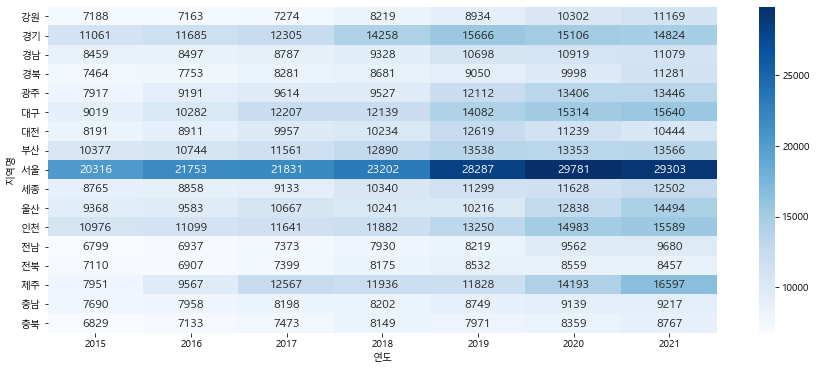

In [156]:
plt.figure(figsize=(15,6))
sns.heatmap(t, annot=True, fmt='.0f', cmap='Blues', annot_kws={'size':12})
plt.show()

### 8. 위의 그룹화한 내용을 선그래프와 막대그래프로 시각화

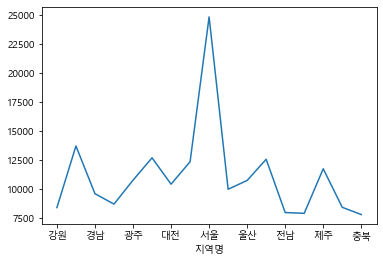

In [89]:
t2 = df_last.groupby(['지역명'])['평당분양가격'].mean()
t2.plot()
plt.show()

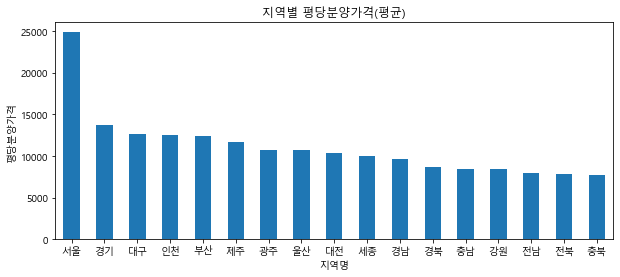

In [160]:
t2 = pd.pivot_table(df_last, index='지역명', values='평당분양가격').sort_values(by='평당분양가격', ascending=False)
t2.plot(kind='bar', figsize=(10,4), legend=None, 
        title="지역별 평당분양가격(평균)", ylabel="평당분양가격",rot=0)
plt.show()

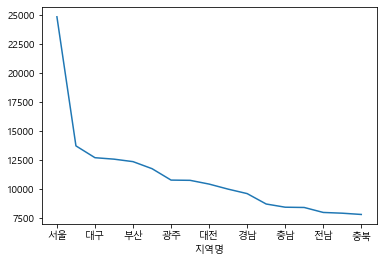

In [163]:
t2.plot(legend=None)
plt.show()

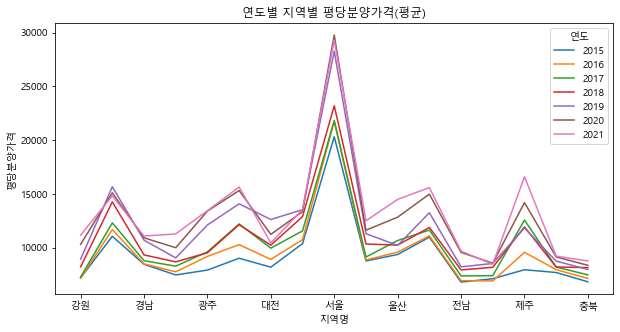

In [164]:
t = df_last.groupby(['지역명', '연도'])['평당분양가격'].mean().unstack()
t.plot(figsize=(10,5), title="연도별 지역별 평당분양가격(평균)", ylabel="평당분양가격")
plt.savefig('data/ch13_example1-1.png')

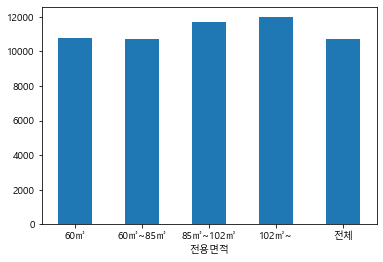

In [114]:
a = df_last.groupby(['전용면적'])['평당분양가격'].mean().to_frame()
a = a.loc[['60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~','전체'],:]
a.plot(kind='bar', legend=None, rot=0)
plt.show()

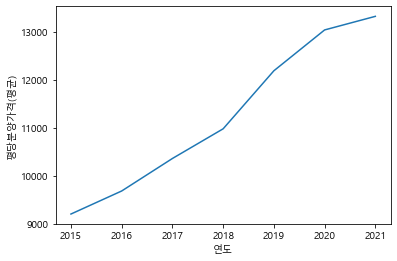

In [115]:
price_per_year=df_last.groupby(df_last['연도'])['평당분양가격'].mean()
price_per_year.plot(legend=None, ylabel="평당분양가격(평균)")
plt.show()

<AxesSubplot:>

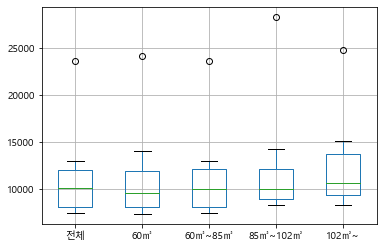

In [117]:
b = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack()
b = b.loc[:,['전체','60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~']]
b.boxplot()

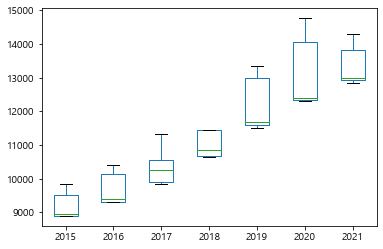

In [131]:
c = df_last.groupby(['연도','전용면적'])['평당분양가격'].mean().unstack().T
c = c.loc[['60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~', '전체'],:]
c.boxplot(grid=False)
plt.show()

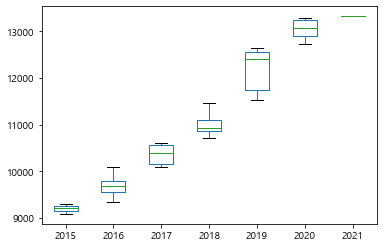

In [141]:
d = df_last.pivot_table(index='월', columns='연도', values='평당분양가격')
d.boxplot(grid=False)
plt.show()

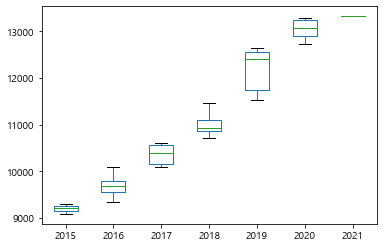

In [174]:
d = df_last.pivot_table(index='월', columns='연도', values='평당분양가격')
d.plot.box()
plt.show()

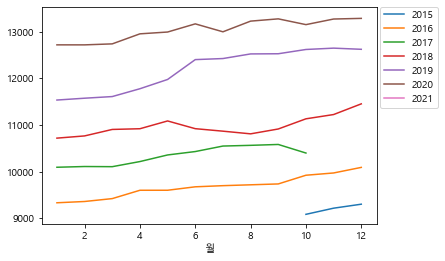

In [178]:
#연도별 월별 평당분양가격의 추이
d.plot()
plt.legend(bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0.)
plt.show()

### 9. seaborn으로 시각화(위에서 그린 시각화내용을 일부또는 그 이상을 seaborn으로 시각화
1) 지역별 평당분양가격(평균)

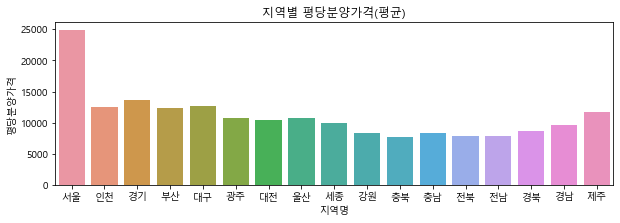

In [179]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.barplot(x='지역명', y='평당분양가격', data=df_last, ci=None).set_title("지역별 평당분양가격(평균)")
plt.savefig('data/ch13_example1-2.png')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

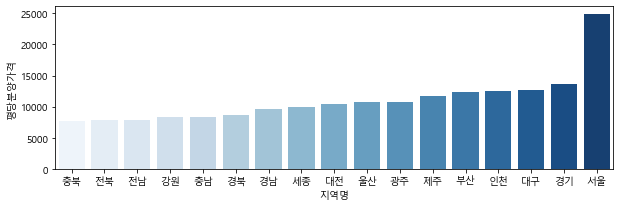

In [185]:
m = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values().to_frame()
plt.figure(figsize=(10,3))
sns.barplot(data=m, x=m.index, y='평당분양가격', palette='Blues')

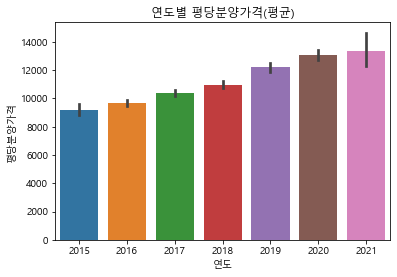

In [198]:
sns.barplot(x='연도', y='평당분양가격', data=df_last).set_title("연도별 평당분양가격(평균)")
plt.show()

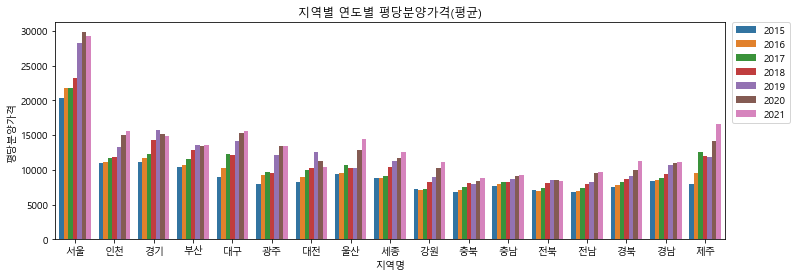

In [199]:
plt.figure(figsize=(12,4))
sns.barplot(x='지역명', y='평당분양가격', data=df_last, ci=None, hue='연도').set_title("지역별 연도별 평당분양가격(평균)")
plt.legend(bbox_to_anchor=(1.01,1), loc=2, borderaxespad=0.)
plt.show()

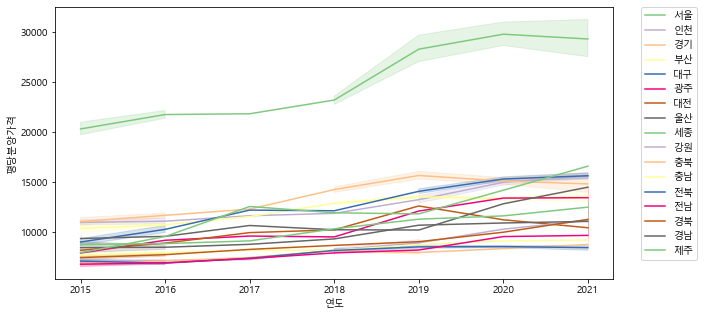

In [189]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', palette='Accent')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Figure size 720x360 with 0 Axes>

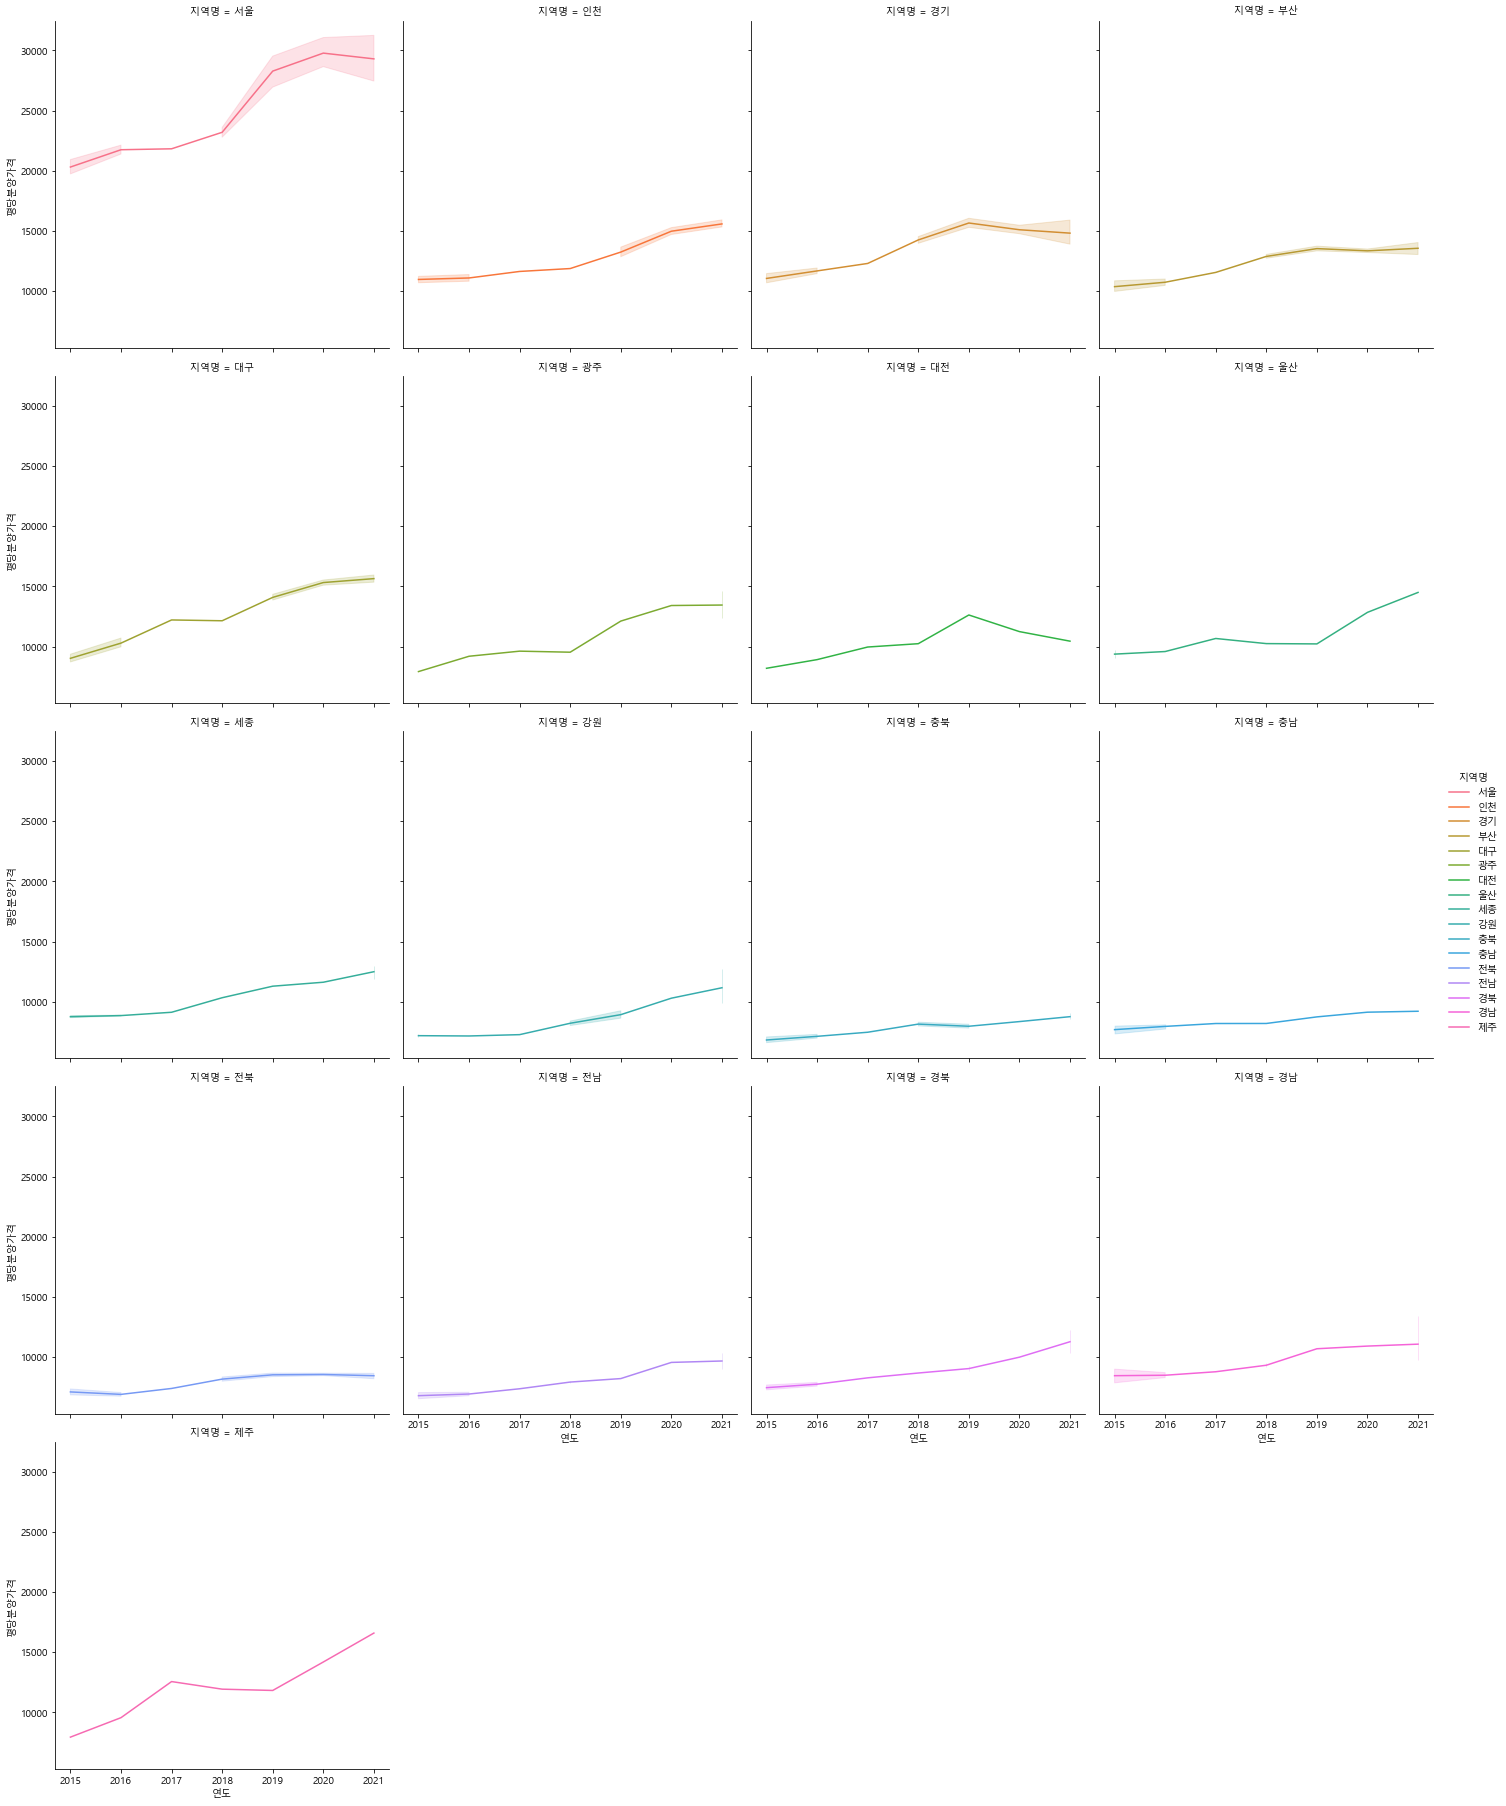

In [192]:
plt.figure(figsize=(10,5))
sns.relplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', 
            kind='line', col='지역명', col_wrap=4)

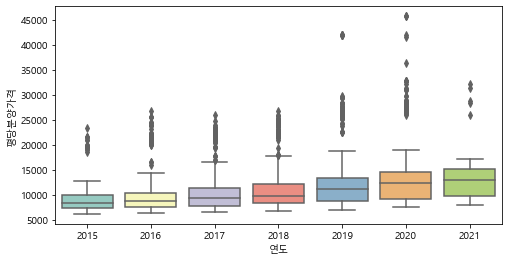

In [201]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_last, x='연도', y='평당분양가격', palette='Set3')
plt.savefig('data/ch13_example1-3.png')

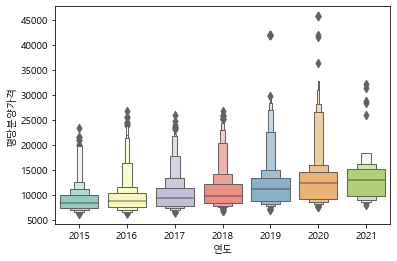

In [204]:
sns.boxenplot(x='연도', y='평당분양가격', data=df_last, palette='Set3')
plt.show()

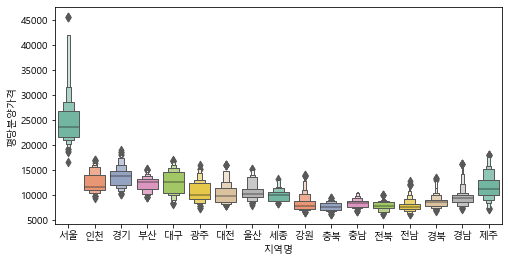

In [211]:
plt.figure(figsize=(8,4))
sns.boxenplot(x='지역명', y='평당분양가격', data=df_last, palette='Set2')
plt.show()

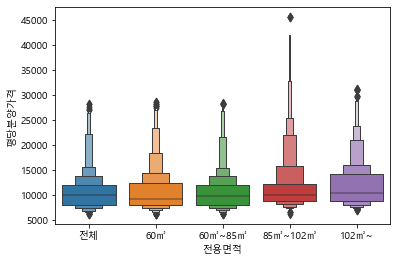

In [212]:
sns.boxenplot(x='전용면적', y='평당분양가격', data=df_last)
plt.show()

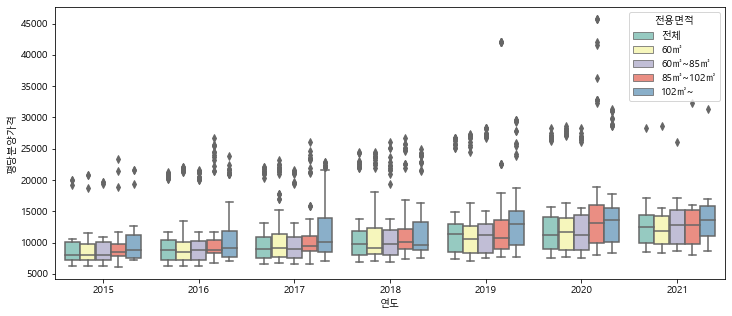

In [197]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적', palette='Set3')
plt.show()

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

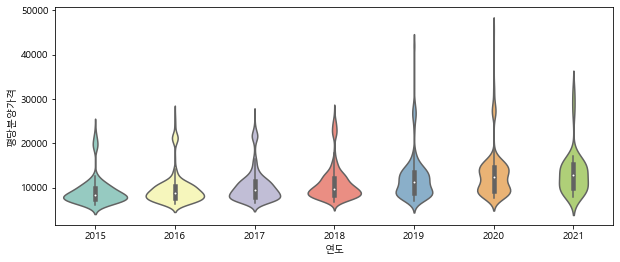

In [213]:
plt.figure(figsize=(10,4))
sns.violinplot(x='연도', y='평당분양가격', data=df_last, palette='Set3')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

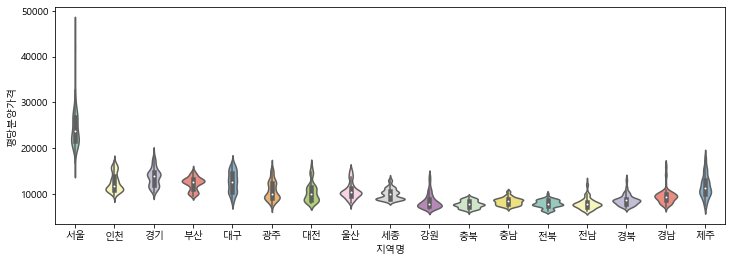

In [214]:
plt.figure(figsize=(12,4))
sns.violinplot(x='지역명', y='평당분양가격', data=df_last, palette='Set3')

<AxesSubplot:xlabel='전용면적', ylabel='평당분양가격'>

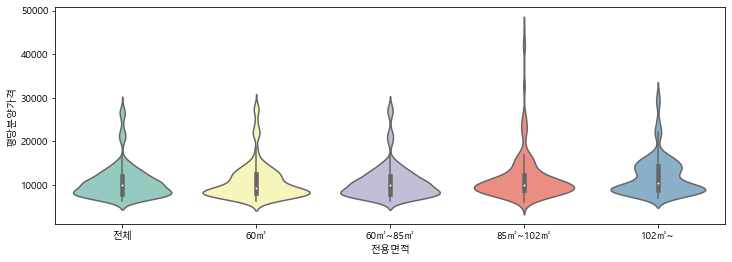

In [215]:
plt.figure(figsize=(12,4))
sns.violinplot(x='전용면적', y='평당분양가격', data=df_last, palette='Set3')

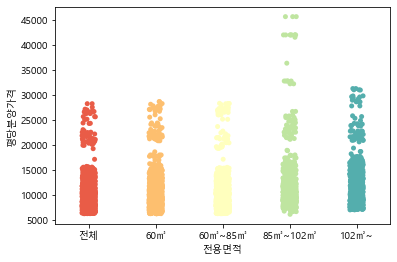

In [217]:
sns.stripplot(x='전용면적', y='평당분양가격', data=df_last, palette='Spectral')
plt.show()

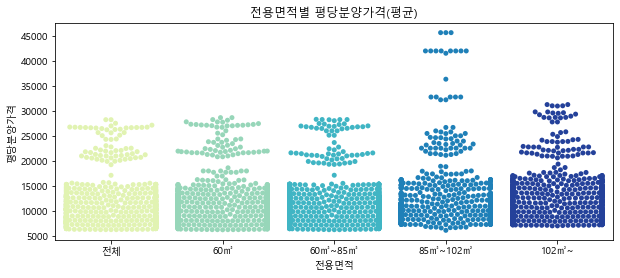

In [220]:
plt.figure(figsize=(10,4))
sns.swarmplot(x='전용면적', y='평당분양가격', data=df_last, palette='YlGnBu').set_title("전용면적별 평당분양가격(평균)")
plt.savefig('data/ch13_example1-4.png')

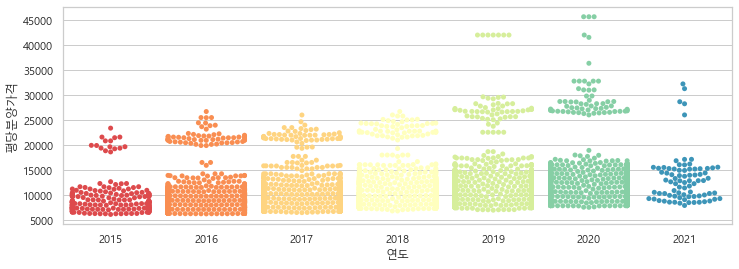

In [224]:
plt.figure(figsize=(12,4))
sns.swarmplot(x='연도', y='평당분양가격', data=df_last, palette='Spectral')
plt.show()

In [226]:
#상기 그래프를 통해 이상치로 추정되는 내용 표로 확인
max_price = df_last[df_last['평당분양가격']>40000]
max_price

,지역명,연도,월,평당분양가격,전용면적
3743,서울,2019,6,42002.4,85㎡~102㎡
3828,서울,2019,7,42002.4,85㎡~102㎡
3913,서울,2019,8,42002.4,85㎡~102㎡
3998,서울,2019,9,42002.4,85㎡~102㎡
4083,서울,2019,10,42002.4,85㎡~102㎡
4168,서울,2019,11,42002.4,85㎡~102㎡
4253,서울,2019,12,42002.4,85㎡~102㎡
4338,서울,2020,1,42002.4,85㎡~102㎡
4423,서울,2020,2,45655.5,85㎡~102㎡
4508,서울,2020,3,45655.5,85㎡~102㎡


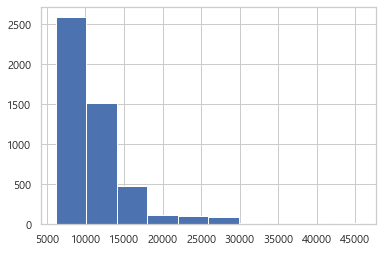

In [228]:
df_last['평당분양가격'].hist()
plt.show()

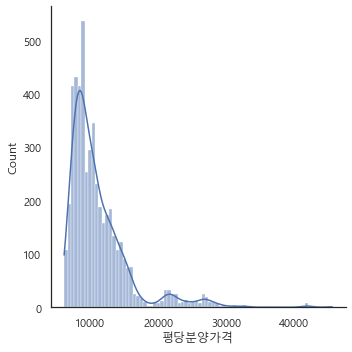

In [233]:
sns.displot(df_last['평당분양가격'], kde=True)
plt.show()

### 10. 구조가 다른 df_first와 df_last의 전용면적 전체의 데이터를 하나의 같은 데이터 셋으로 합쳐서 분석

In [237]:
df_last.sample()

,지역명,연도,월,평당분양가격,전용면적
2513,강원,2018,3,9339.0,85㎡~102㎡


In [236]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [241]:
new_df_first = df_first.melt(id_vars='지역', var_name='연도월', value_name='평당분양가격')
new_df_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [243]:
new_df_first["연도"] = new_df_first["연도월"].apply(lambda x:int(x.split("년")[0]))
new_df_first["월"] = new_df_first["연도월"].apply(lambda x:int(x.split("년")[1].replace("월","")))
new_df_first.head()

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [244]:
new_df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [245]:
new_first = new_df_first.drop('연도월', axis=1)
new_first.head()

,지역,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [246]:
new_first.columns=['지역명', '평당분양가격','연도','월']
new_first.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [250]:
new_last = df_last[df_last['전용면적']=='전체']
new_last.drop('전용면적', axis=1, inplace=True)
new_last.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [251]:
result=pd.concat([new_first, new_last])
result.head()

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12


In [253]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 5435
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     1445 non-null   object 
 1   평당분양가격  1413 non-null   float64
 2   연도      1445 non-null   int64  
 3   월       1445 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 56.4+ KB


In [259]:
result.pivot_table(index='연도', values='평당분양가격', columns='지역명').T

연도,2013,2014,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,,,
강원,6230.0,6332.500000,6831.154545,7011.125,7126.8,7680.750,8141.650,9331.300,10355.4
경기,10855.0,10509.083333,10489.109091,11220.000,11850.0,13185.975,14468.850,14383.325,14414.4
경남,6473.0,6728.750000,7646.163636,7847.950,8119.8,9019.450,9870.850,10160.700,9860.4
경북,6168.0,6536.500000,7035.063636,7360.650,7794.9,8505.200,8856.650,9544.975,10345.5
광주,6098.0,7587.833333,7956.090909,8898.725,9463.5,9855.725,11822.800,12500.125,12906.3
대구,8080.0,8286.083333,8706.718182,10310.025,11455.8,12075.800,13852.025,15145.075,15354.9
대전,8321.0,8240.333333,8104.509091,8501.625,9044.7,10180.225,11777.700,11094.050,10579.8
부산,8111.0,9180.166667,9633.272727,10429.925,11577.9,12997.875,13116.400,13247.575,14038.2
서울,18189.0,18997.250000,19282.600000,20663.500,21375.9,22889.350,26131.050,26910.125,28267.8


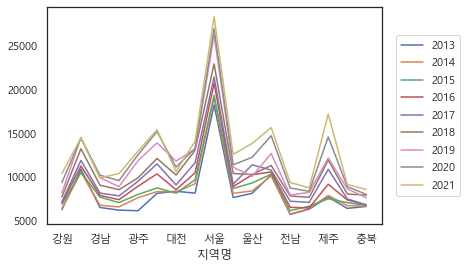

In [261]:
temp = result.pivot_table(index='연도', values='평당분양가격', columns='지역명').T.plot()
temp.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

In [262]:
result

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
5415,전북,8708.7,2021,1
5420,전남,9329.1,2021,1
5425,경북,10345.5,2021,1
5430,경남,9860.4,2021,1


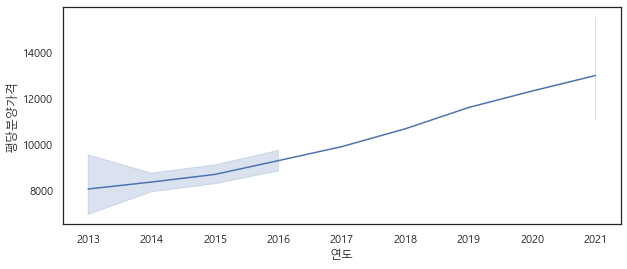

In [263]:
plt.figure(figsize=(10,4))
sns.lineplot(x='연도', y='평당분양가격', data=result)
plt.show()

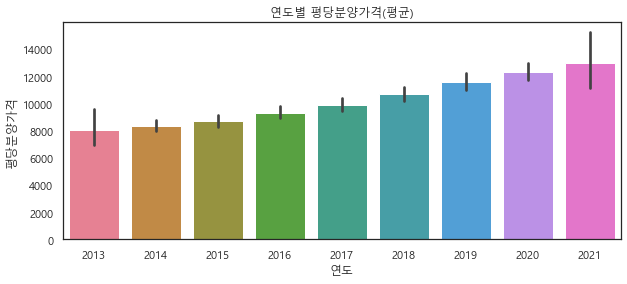

In [266]:
plt.figure(figsize=(10,4))
sns.barplot(x='연도', y='평당분양가격', data=result, palette='husl').set_title('연도별 평당분양가격(평균)')
plt.savefig('data/ch13_example1-5.png')

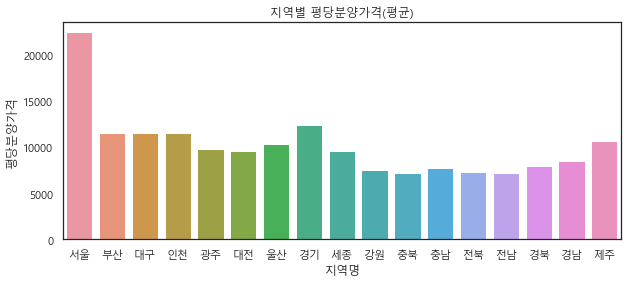

In [267]:
plt.figure(figsize=(10,4))
sns.barplot(x='지역명', y='평당분양가격', data=result, ci=None).set_title('지역별 평당분양가격(평균)')
plt.savefig('data/ch13_example1-6.png')

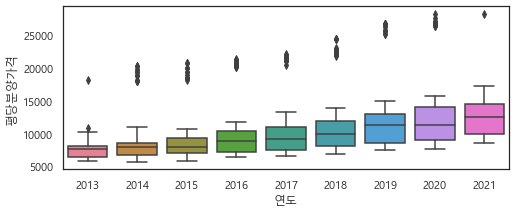

In [269]:
plt.figure(figsize=(8,3))
sns.boxplot(x='연도', y='평당분양가격', data=result, palette='husl')
plt.show()

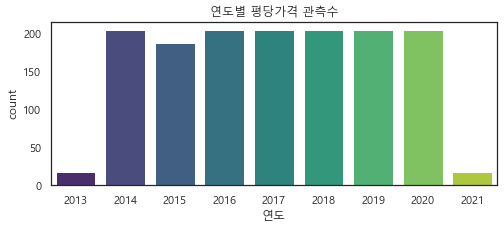

In [271]:
plt.figure(figsize=(8,3))
sns.countplot(x='연도', data=result, palette="viridis").set_title("연도별 평당가격 관측수")
plt.show()

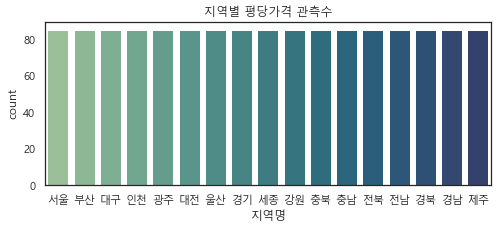

In [272]:
plt.figure(figsize=(8,3))
sns.countplot(x='지역명', data=result, palette='crest').set_title("지역별 평당가격 관측수")
plt.show()

In [273]:
result.corr()

,평당분양가격,연도,월
평당분양가격,1.000000,0.361135,0.029817
연도,0.361135,1.000000,-0.062838
월,0.029817,-0.062838,1.000000


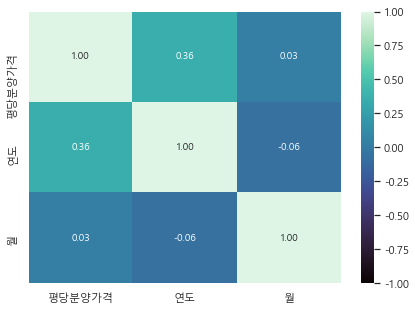

In [274]:
plt.figure(figsize=(7,5))
sns.heatmap(result.corr(), vmin=-1, vmax=1, annot=True, cmap='mako', fmt='.2f')
plt.savefig('data/ch13_example1-7.png')

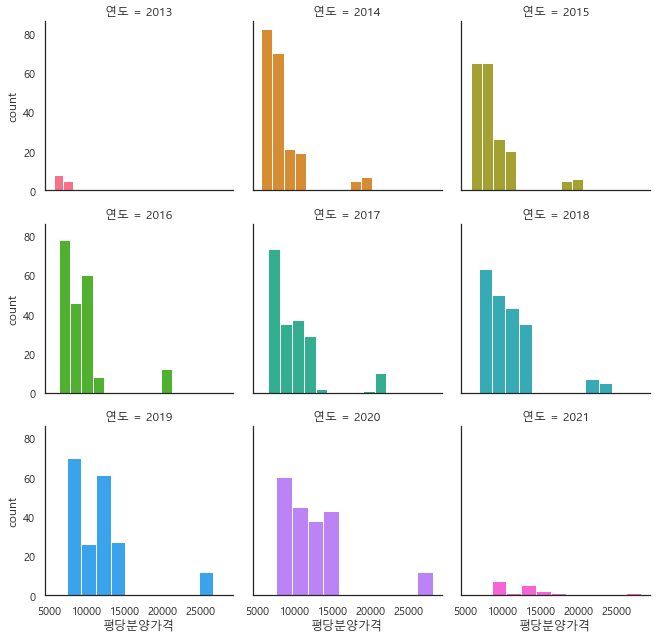

In [279]:
g = sns.FacetGrid(result, col='연도', hue='연도', col_wrap=3, palette='husl')
g.map(plt.hist, '평당분양가격')
g.set_axis_labels(y_var='count')
plt.savefig('data/ch13_example1-8.png')